In [121]:
import pandas as pd

df = pd.read_csv("/kaggle/input/bike-sharing/bike-sharing-dataset.csv")
df

,date_time,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
0,2011-01-01 00:00:00,0.0,0.0,clear,9.84,14.395,81.0,0.0000,16.0,1,0,5
1,2011-01-01 01:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0000,40.0,1,1,5
2,2011-01-01 02:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0000,32.0,1,2,5
3,2011-01-01 03:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0000,13.0,1,3,5
4,2011-01-01 04:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0000,1.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,0.0,1.0,mist,10.66,12.880,60.0,11.0014,119.0,12,19,0
17540,2012-12-31 20:00:00,0.0,1.0,mist,10.66,12.880,60.0,11.0014,89.0,12,20,0
17541,2012-12-31 21:00:00,0.0,1.0,clear,10.66,12.880,60.0,11.0014,90.0,12,21,0
17542,2012-12-31 22:00:00,0.0,1.0,clear,10.66,13.635,56.0,8.9981,61.0,12,22,0


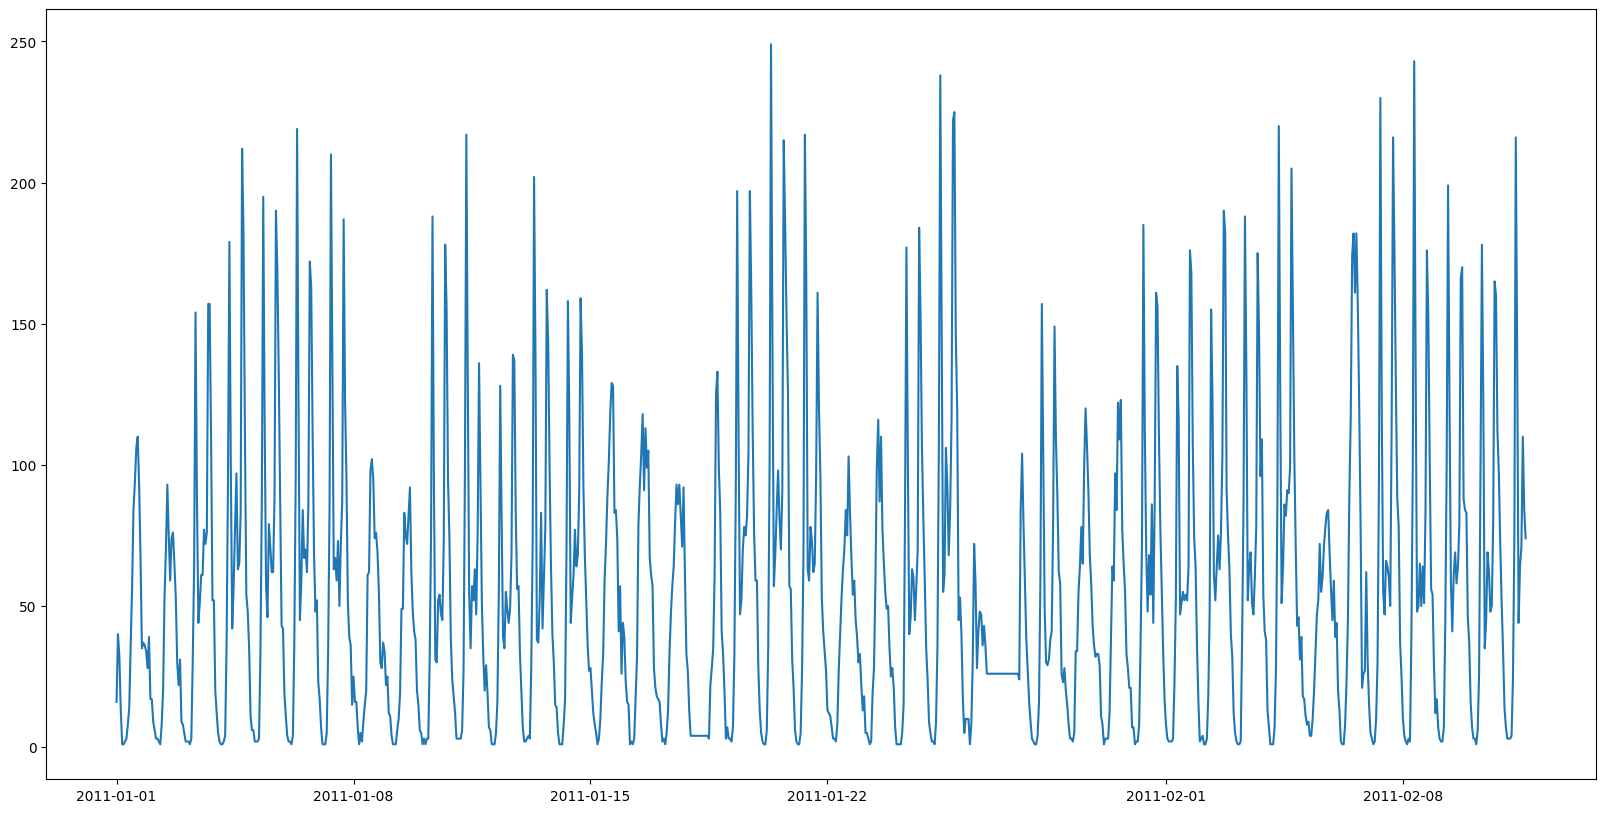

In [122]:
import matplotlib.pyplot as plt

df['date_time'] = pd.to_datetime(df['date_time'])

plt.figure(figsize=(20, 10))
plt.plot(df['date_time'][:1000], df['users'][:1000])
plt.show()

In [123]:
df.index = df['date_time']
df = df.drop(columns=['date_time'], axis=1)
df

,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
date_time,,,,,,,,,,,
2011-01-01 00:00:00,0.0,0.0,clear,9.84,14.395,81.0,0.0000,16.0,1,0,5
2011-01-01 01:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0000,40.0,1,1,5
2011-01-01 02:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0000,32.0,1,2,5
2011-01-01 03:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0000,13.0,1,3,5
2011-01-01 04:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0000,1.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.0,1.0,mist,10.66,12.880,60.0,11.0014,119.0,12,19,0
2012-12-31 20:00:00,0.0,1.0,mist,10.66,12.880,60.0,11.0014,89.0,12,20,0
2012-12-31 21:00:00,0.0,1.0,clear,10.66,12.880,60.0,11.0014,90.0,12,21,0


In [124]:
train_ratio = 0.8

train_data = df[:int(len(df) * train_ratio)]
test_data = df[int(len(df) * train_ratio):]

print(train_data.shape, test_data.shape)
train_data

(14035, 11) (3509, 11)


,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
date_time,,,,,,,,,,,
2011-01-01 00:00:00,0.0,0.0,clear,9.84,14.395,81.0,0.0000,16.0,1,0,5
2011-01-01 01:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0000,40.0,1,1,5
2011-01-01 02:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0000,32.0,1,2,5
2011-01-01 03:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0000,13.0,1,3,5
2011-01-01 04:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0000,1.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...
2012-08-07 14:00:00,0.0,1.0,mist,33.62,37.880,46.0,0.0000,261.0,8,14,1
2012-08-07 15:00:00,0.0,1.0,clear,32.80,37.120,52.0,0.0000,306.0,8,15,1
2012-08-07 16:00:00,0.0,1.0,rain,31.16,36.365,66.0,19.0012,445.0,8,16,1


In [125]:
train_data_transform = train_data.copy(deep=True)
test_data_transform = test_data.copy(deep=True)

### Scale train, test data

In [126]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

weather_category = ['rain', 'mist', 'clear'] 
encoder = OrdinalEncoder(categories=[weather_category])

train_data_transform["weather"] = encoder.fit_transform(train_data[["weather"]])
test_data_transform["weather"] = encoder.transform(test_data[["weather"]])

print(test_data_transform.shape)

train_data_transform

(3509, 11)


,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
date_time,,,,,,,,,,,
2011-01-01 00:00:00,0.0,0.0,2.0,9.84,14.395,81.0,0.0000,16.0,1,0,5
2011-01-01 01:00:00,0.0,0.0,2.0,9.02,13.635,80.0,0.0000,40.0,1,1,5
2011-01-01 02:00:00,0.0,0.0,2.0,9.02,13.635,80.0,0.0000,32.0,1,2,5
2011-01-01 03:00:00,0.0,0.0,2.0,9.84,14.395,75.0,0.0000,13.0,1,3,5
2011-01-01 04:00:00,0.0,0.0,2.0,9.84,14.395,75.0,0.0000,1.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...
2012-08-07 14:00:00,0.0,1.0,1.0,33.62,37.880,46.0,0.0000,261.0,8,14,1
2012-08-07 15:00:00,0.0,1.0,2.0,32.80,37.120,52.0,0.0000,306.0,8,15,1
2012-08-07 16:00:00,0.0,1.0,0.0,31.16,36.365,66.0,19.0012,445.0,8,16,1


In [127]:
scaler = MinMaxScaler()

train_data_transform = scaler.fit_transform(train_data_transform)
test_data_transform = scaler.transform(test_data_transform)

train_data_transform, test_data_transform

(array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.83333333],
        [0.        , 0.        , 1.        , ..., 0.        , 0.04347826,
         0.83333333],
        [0.        , 0.        , 1.        , ..., 0.        , 0.08695652,
         0.83333333],
        ...,
        [0.        , 1.        , 0.        , ..., 0.63636364, 0.69565217,
         0.16666667],
        [0.        , 1.        , 0.5       , ..., 0.63636364, 0.73913043,
         0.16666667],
        [0.        , 1.        , 0.5       , ..., 0.63636364, 0.7826087 ,
         0.16666667]]),
 array([[0.        , 1.        , 0.5       , ..., 0.63636364, 0.82608696,
         0.16666667],
        [0.        , 1.        , 0.5       , ..., 0.63636364, 0.86956522,
         0.16666667],
        [0.        , 1.        , 0.5       , ..., 0.63636364, 0.91304348,
         0.16666667],
        ...,
        [0.        , 1.        , 1.        , ..., 1.        , 0.91304348,
         0.        ],
        [0. 

In [128]:
result_df_transformed = pd.DataFrame(data=train_data_transform, columns=train_data.columns, index=train_data.index)
result_df_transformed

,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
date_time,,,,,,,,,,,
2011-01-01 00:00:00,0.0,0.0,1.0,0.224490,0.2879,0.81,0.000000,0.015690,0.000000,0.000000,0.833333
2011-01-01 01:00:00,0.0,0.0,1.0,0.204082,0.2727,0.80,0.000000,0.040795,0.000000,0.043478,0.833333
2011-01-01 02:00:00,0.0,0.0,1.0,0.204082,0.2727,0.80,0.000000,0.032427,0.000000,0.086957,0.833333
2011-01-01 03:00:00,0.0,0.0,1.0,0.224490,0.2879,0.75,0.000000,0.012552,0.000000,0.130435,0.833333
2011-01-01 04:00:00,0.0,0.0,1.0,0.224490,0.2879,0.75,0.000000,0.000000,0.000000,0.173913,0.833333
...,...,...,...,...,...,...,...,...,...,...,...
2012-08-07 14:00:00,0.0,1.0,0.5,0.816327,0.7576,0.46,0.000000,0.271967,0.636364,0.608696,0.166667
2012-08-07 15:00:00,0.0,1.0,1.0,0.795918,0.7424,0.52,0.000000,0.319038,0.636364,0.652174,0.166667
2012-08-07 16:00:00,0.0,1.0,0.0,0.755102,0.7273,0.66,0.333373,0.464435,0.636364,0.695652,0.166667


In [129]:
import numpy as np

n_past = 32
target_column = "users"
target = df.columns.get_loc(target_column)

def create_X_y(data, n_past):
    X = []
    y = []
    
    for i in range(n_past, len(data)):
        X.append(data[i-n_past:i, 0:data.shape[1]])
        y.append(data[i,target])
        
    return np.array(X), np.array(y)

X_train, y_train = create_X_y(train_data_transform, n_past)
X_test, y_test = create_X_y(test_data_transform, n_past)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14003, 32, 11), (14003,), (3477, 32, 11), (3477,))

In [130]:
print(X_train[1][-1][target])
print(y_train[0])

y_train[0] == X_train[1][-1][target]

0.007322175732217572
0.007322175732217572


True

In [131]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [132]:
X_train.shape, y_train.shape, train_data.shape

((14003, 32, 11), (14003,), (14035, 11))

In [133]:
batch_size = 64

def create_batch_loader(X_data, y_data, batch_size):
    number_of_batch = X_data.shape[0] // batch_size
    
    X_data_transform = X_data[:number_of_batch * batch_size].reshape(number_of_batch, batch_size, X_data.shape[1], X_train.shape[2])
    y_data_transform = y_data[:number_of_batch * batch_size].reshape(number_of_batch, batch_size, 1)
    
    return X_data_transform, y_data_transform
    
X_train_transform, y_train_transform = create_batch_loader(X_train, y_train, batch_size)
X_test_transform, y_test_transform = create_batch_loader(X_test, y_test, batch_size)

print(X_train_transform.shape)
print(y_train_transform.shape)
print(X_test_transform.shape)
print(y_test_transform.shape)

(218, 64, 32, 11)
(218, 64, 1)
(54, 64, 32, 11)
(54, 64, 1)


In [134]:
import torch.nn as nn

class Model(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()

#         self.rnn = nn.RNN(input_size, hidden_size)
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.dropout = nn.Dropout(p=0.2)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        rnn_out, _ = self.lstm(x)
        x = self.dropout(rnn_out)
        x = self.linear(x)
        return x

In [135]:
input_size = X_train.shape[2]
hidden_size = 256
output_size = 1
num_epochs = 20

model = Model(input_size, hidden_size, output_size).to(device)
optimizer = torch.optim.Adam(params = model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [136]:
def train_one_epoch(X_train_transform, y_train_transform, model, criterion, optimizer, epoch, num_epochs):
    running_loss = 0
    
    for i, data in enumerate(X_train_transform):
        labels = y_train_transform[i]
        
        data = torch.tensor(data, dtype=torch.float32).to(device)
        labels = torch.tensor(labels, dtype=torch.float32).to(device)
        
        optimizer.zero_grad()
        
        outputs = model(data)
        
        loss = criterion(outputs[:,-1,:], labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    avg_loss = running_loss / X_train_transform.shape[0]
    
    print(f"At epoch {epoch+1}/{num_epochs}, Loss is {avg_loss}")

    return avg_loss

In [137]:
def train(X_train_transform, y_train_transform, model, criterion, optimizer, num_epochs):
    loss_history = []
    
    for epoch in range(num_epochs):
        model.train(True)
        
        avg_loss = train_one_epoch(X_train_transform, y_train_transform, model, criterion, optimizer, epoch, num_epochs)
        
        loss_history.append(avg_loss)
        
    return loss_history
        
    print("Finish training!!")
    
loss_history = train(X_train_transform, y_train_transform, model, criterion, optimizer, num_epochs)

At epoch 1/20, Loss is 0.009580980618954252
At epoch 2/20, Loss is 0.00490079947251724
At epoch 3/20, Loss is 0.003909983385435451
At epoch 4/20, Loss is 0.0033133828197071894
At epoch 5/20, Loss is 0.0029448974958232203
At epoch 6/20, Loss is 0.002789644543946627
At epoch 7/20, Loss is 0.002663183244962006
At epoch 8/20, Loss is 0.002457390275544598
At epoch 9/20, Loss is 0.002307860746257725
At epoch 10/20, Loss is 0.0022319785828986247
At epoch 11/20, Loss is 0.0021459323187452664
At epoch 12/20, Loss is 0.002080644352720418
At epoch 13/20, Loss is 0.0020360051999520085
At epoch 14/20, Loss is 0.0019832743338999174
At epoch 15/20, Loss is 0.0019499168319012457
At epoch 16/20, Loss is 0.001915542205631169
At epoch 17/20, Loss is 0.0018682502360465518
At epoch 18/20, Loss is 0.001809256395897529
At epoch 19/20, Loss is 0.001828116157579176
At epoch 20/20, Loss is 0.00176823608736922


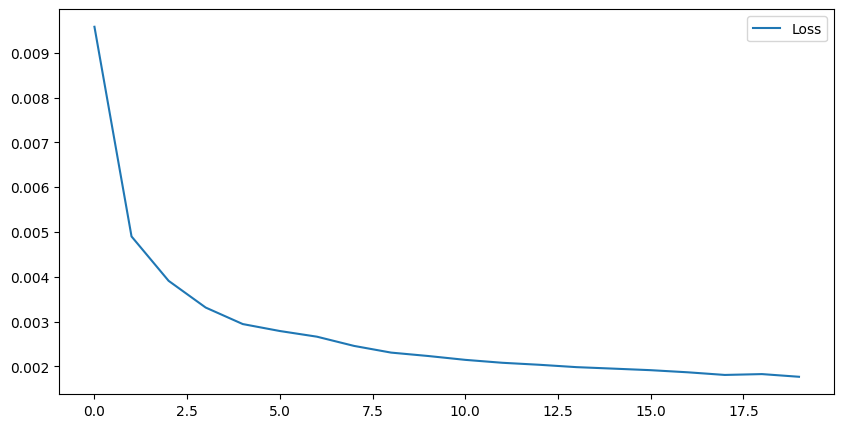

In [138]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.plot(list(range(num_epochs)), loss_history, label="Loss")
plt.legend()
plt.show()

In [139]:
model.eval()

Model(
  (lstm): LSTM(11, 256)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): Linear(in_features=256, out_features=1, bias=True)
)

In [140]:
X_test_transform.shape, X_test.shape

((54, 64, 32, 11), (3477, 32, 11))

In [141]:
predictions = []

with torch.no_grad():
    for data_test in X_test:
        data_test = torch.tensor(data_test, dtype=torch.float32).to(device)
        preds = model(data_test)
        
        predictions.append(preds[-1].item())

predictions[:10]

[0.014840461313724518,
 0.021135129034519196,
 0.0633997768163681,
 0.180641308426857,
 0.46985918283462524,
 0.7602640986442566,
 0.3452399969100952,
 0.2078058272600174,
 0.2344244122505188,
 0.313328355550766]

In [142]:
y_test[:10]

array([0.00523013, 0.00941423, 0.041841  , 0.17364017, 0.4958159 ,
       0.7290795 , 0.36820084, 0.21338912, 0.2709205 , 0.28870293])

In [143]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

0.952054466879359

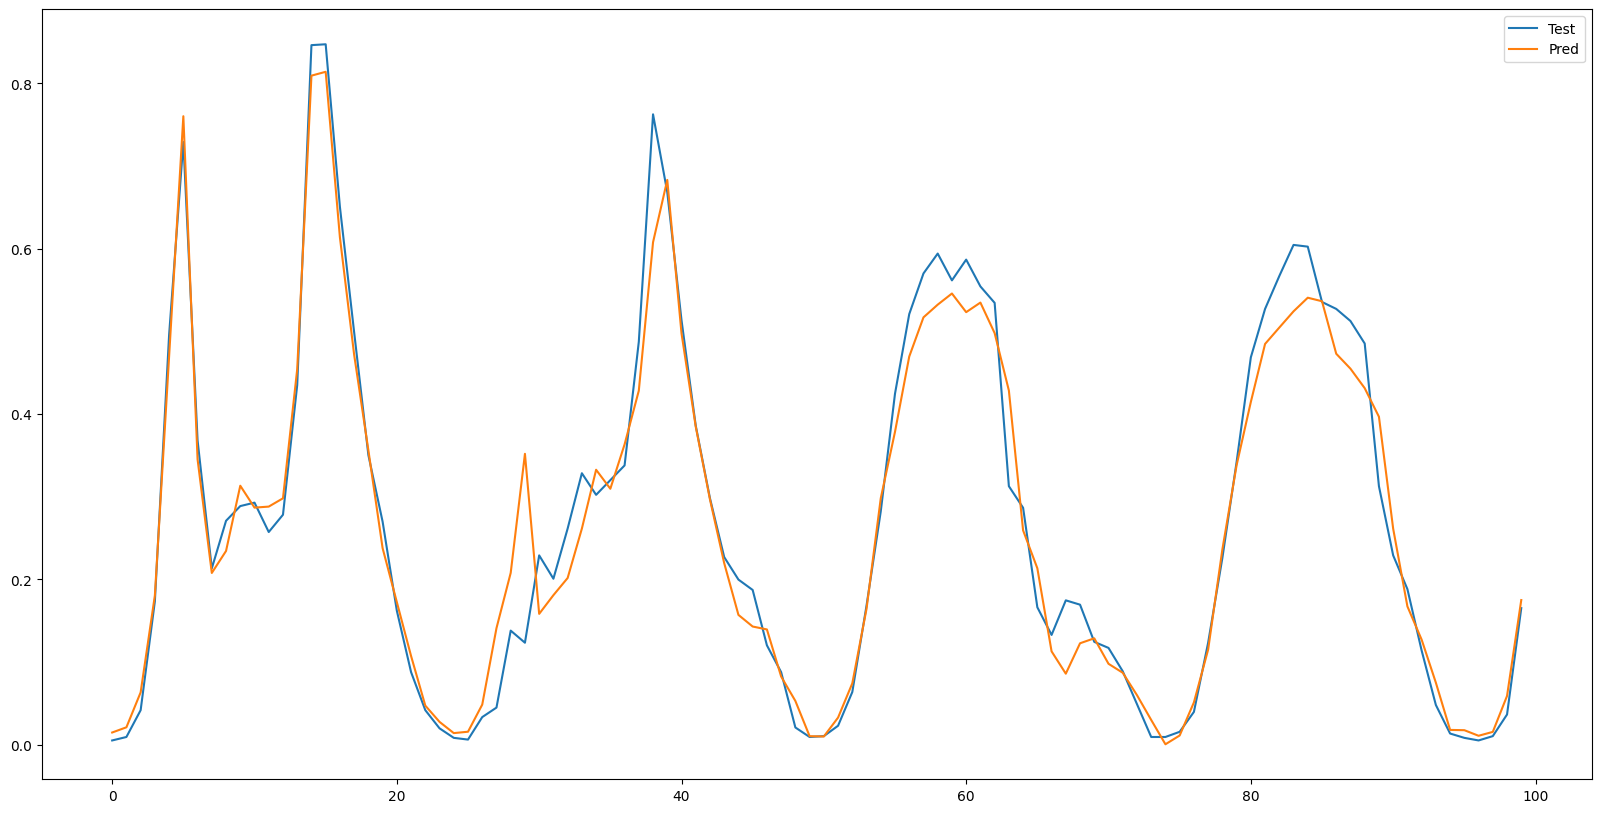

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(y_test[:100], label="Test")
plt.plot(predictions[:100], label="Pred")
plt.legend()
plt.show()


In [145]:
test_data_transform.shape

(3509, 11)

In [146]:
predictions_tile = np.tile(np.array(predictions).reshape(-1,1), df.shape[1])
predictions_tile

array([[0.01484046, 0.01484046, 0.01484046, ..., 0.01484046, 0.01484046,
        0.01484046],
       [0.02113513, 0.02113513, 0.02113513, ..., 0.02113513, 0.02113513,
        0.02113513],
       [0.06339978, 0.06339978, 0.06339978, ..., 0.06339978, 0.06339978,
        0.06339978],
       ...,
       [0.05615281, 0.05615281, 0.05615281, ..., 0.05615281, 0.05615281,
        0.05615281],
       [0.06965326, 0.06965326, 0.06965326, ..., 0.06965326, 0.06965326,
        0.06965326],
       [0.05323534, 0.05323534, 0.05323534, ..., 0.05323534, 0.05323534,
        0.05323534]])

In [147]:
predict_test = np.concatenate([test_data_transform[0:n_past], predictions_tile], axis=0)
predict_test, predict_test.shape

(array([[0.        , 1.        , 0.5       , ..., 0.63636364, 0.82608696,
         0.16666667],
        [0.        , 1.        , 0.5       , ..., 0.63636364, 0.86956522,
         0.16666667],
        [0.        , 1.        , 0.5       , ..., 0.63636364, 0.91304348,
         0.16666667],
        ...,
        [0.05615281, 0.05615281, 0.05615281, ..., 0.05615281, 0.05615281,
         0.05615281],
        [0.06965326, 0.06965326, 0.06965326, ..., 0.06965326, 0.06965326,
         0.06965326],
        [0.05323534, 0.05323534, 0.05323534, ..., 0.05323534, 0.05323534,
         0.05323534]]),
 (3509, 11))

In [148]:
predict_test = scaler.inverse_transform(predict_test)
predict_test, predict_test.shape

(array([[ 0.        ,  1.        ,  1.        , ...,  8.        ,
         19.        ,  1.        ],
        [ 0.        ,  1.        ,  1.        , ...,  8.        ,
         20.        ,  1.        ],
        [ 0.        ,  1.        ,  1.        , ...,  8.        ,
         21.        ,  1.        ],
        ...,
        [ 0.05615281,  0.05615281,  0.11230563, ...,  1.61768094,
          1.2915147 ,  0.33691688],
        [ 0.06965326,  0.06965326,  0.13930652, ...,  1.76618584,
          1.60202493,  0.41791955],
        [ 0.05323534,  0.05323534,  0.10647067, ...,  1.58558871,
          1.22441275,  0.31941202]]),
 (3509, 11))

In [149]:
predict_df = pd.DataFrame(data=predict_test, columns=test_data.columns, index=test_data.index)
predict_df

,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
date_time,,,,,,,,,,,
2012-08-07 19:00:00,0.000000,1.000000,1.000000,31.160000,36.365000,66.000000,7.001500,610.000000,8.000000,19.000000,1.000000
2012-08-07 20:00:00,0.000000,1.000000,1.000000,30.340000,34.850000,70.000000,8.998100,448.000000,8.000000,20.000000,1.000000
2012-08-07 21:00:00,0.000000,1.000000,1.000000,29.520000,34.850000,74.000000,0.000000,317.000000,8.000000,21.000000,1.000000
2012-08-07 22:00:00,0.000000,1.000000,2.000000,29.520000,34.850000,74.000000,7.001500,224.000000,8.000000,22.000000,1.000000
2012-08-07 23:00:00,0.000000,1.000000,2.000000,29.520000,34.850000,79.000000,0.000000,138.000000,8.000000,23.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.090199,0.090199,0.180398,4.444199,4.509955,9.019909,5.141069,87.230331,1.992190,2.074579,0.541195
2012-12-31 20:00:00,0.078727,0.078727,0.157454,3.983246,3.936344,7.872687,4.487188,76.262890,1.865996,1.810718,0.472361
2012-12-31 21:00:00,0.056153,0.056153,0.112306,3.076220,2.807641,5.615281,3.200536,54.682089,1.617681,1.291515,0.336917


In [150]:
test_data_df = pd.DataFrame(data=test_data, columns=test_data.columns, index=test_data.index)
test_data_df

,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
date_time,,,,,,,,,,,
2012-08-07 19:00:00,0.0,1.0,mist,31.16,36.365,66.0,7.0015,610.0,8,19,1
2012-08-07 20:00:00,0.0,1.0,mist,30.34,34.850,70.0,8.9981,448.0,8,20,1
2012-08-07 21:00:00,0.0,1.0,mist,29.52,34.850,74.0,0.0000,317.0,8,21,1
2012-08-07 22:00:00,0.0,1.0,clear,29.52,34.850,74.0,7.0015,224.0,8,22,1
2012-08-07 23:00:00,0.0,1.0,clear,29.52,34.850,79.0,0.0000,138.0,8,23,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.0,1.0,mist,10.66,12.880,60.0,11.0014,119.0,12,19,0
2012-12-31 20:00:00,0.0,1.0,mist,10.66,12.880,60.0,11.0014,89.0,12,20,0
2012-12-31 21:00:00,0.0,1.0,clear,10.66,12.880,60.0,11.0014,90.0,12,21,0


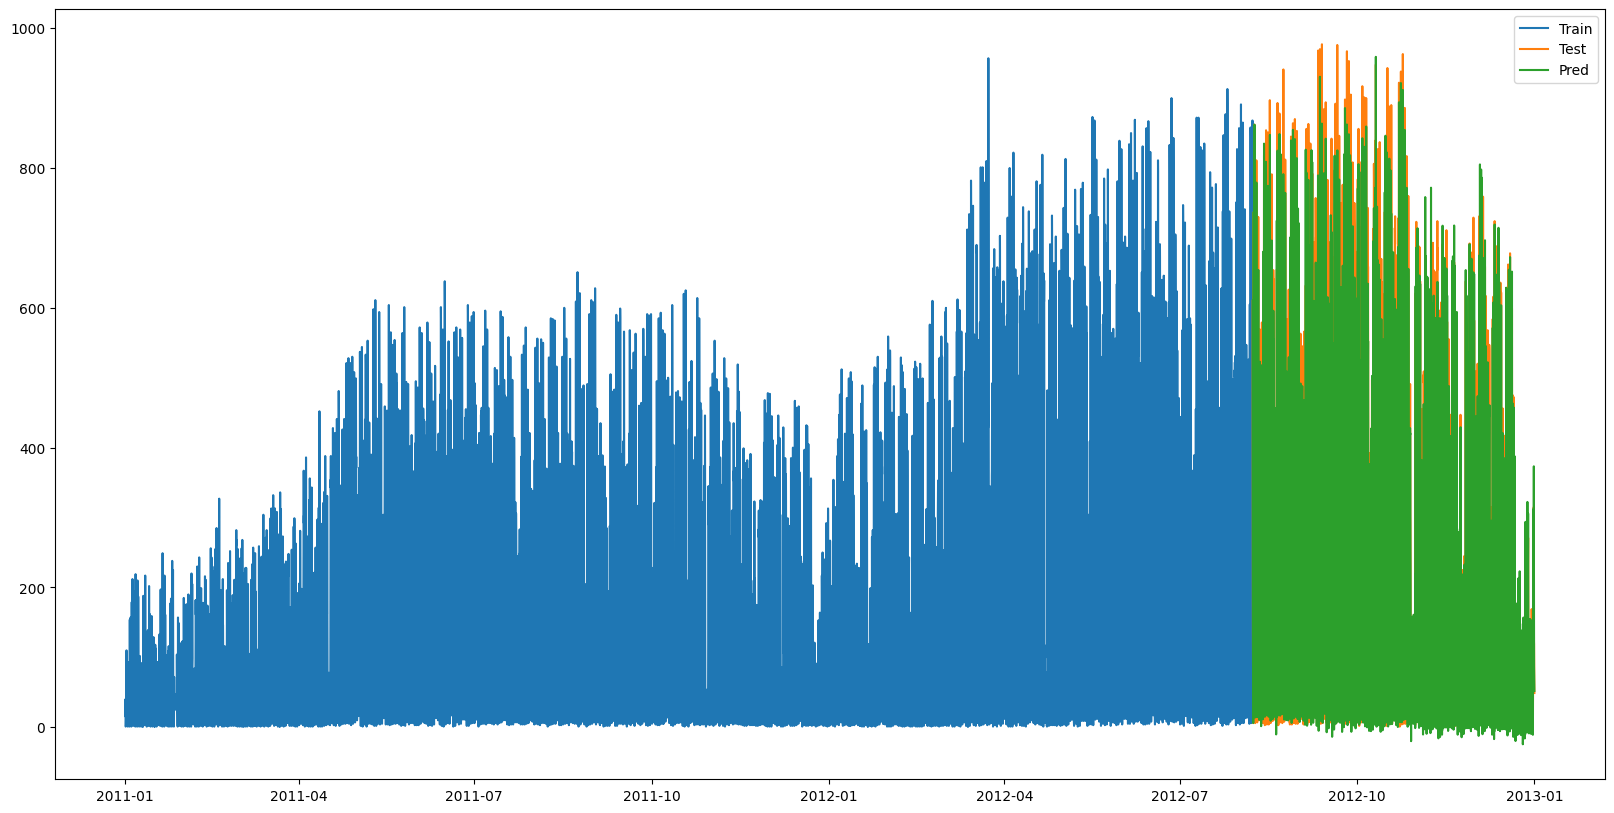

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(train_data.index, train_data['users'], label="Train")
plt.plot(test_data.index, test_data['users'], label="Test")
plt.plot(predict_df.index, predict_df['users'], label="Pred")
plt.legend()
plt.show()


In [152]:
r2_score(test_data['users'], predict_df['users'])

0.9526240755042434